<a href="https://colab.research.google.com/github/karthikpuranik11/FIRE2021/blob/main/Tamil/ULMFiT_Tamil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
train=pd.read_csv('/content/tamil_sentiment_full_train.tsv', sep="\t")
train

,text,category
0,Vani bhojam fans hit like solli 500 like Vangi...,unknown_state
1,I love you ajith very I like,Positive
2,ennaya trailer Ku mudi Ellam nikkudhu... Vera ...,Positive
3,Vijay Annaa Ur Maassssss Therrrrriiiiii,Positive
4,நம்ப நடே நாசாமா தான் போச்சி,Negative
...,...,...
35651,ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...,Mixed_feelings
35652,Repeated Mode to Watching Theri Trailer & Ther...,Positive
35653,yeevanikuachu pula kutti erudhal oodi poyidu....,Negative
35654,She is looking like laughing budha,Positive


In [3]:
val=pd.read_csv('/content/tamil_sentiment_full_test_withtlabels.tsv', sep="\t")
#val['tweet']=val['text']
#val=val.drop(columns=['Unnamed: 2','text'])
val

,id,text,category
0,Tam_1,வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி...,Positive
1,Tam_2,Teruk ah irukku .... mokke movie .. waste of time,Negative
2,Tam_3,manitha samuthaayam amaipil irunthu intha pada...,Positive
3,Tam_4,JJ mam we miss u,Positive
4,Tam_5,Subtitle me traller dekhne wale like karo,not-Tamil
...,...,...,...
4397,Tam_4398,Ithukum dislike potta kammanattti koovaingalam...,Negative
4398,Tam_4399,Suyama Sinthikiravan than super Hero Seama dia...,Mixed_feelings
4399,Tam_4400,Super thalaiva.... Nee mass dha eppavume,Positive
4400,Tam_4401,பெண்ணை அடிமையாக்க நினைக்கும் இந்த படம் தோல்வித...,unknown_state


In [4]:
df=train.filter(['category','text'], axis=1)
df_test=val.filter(['category','text'],axis=1)

In [5]:
#removing @ and #
def punc(df):
    df['text'] = df['text'].str.replace('[#@()]','')
    print(df)

In [6]:
punc(df)
punc(df_test)

             category                                               text
0       unknown_state  Vani bhojam fans hit like solli 500 like Vangi...
1            Positive                       I love you ajith very I like
2            Positive  ennaya trailer Ku mudi Ellam nikkudhu... Vera ...
3            Positive           Vijay Annaa  Ur Maassssss Therrrrriiiiii
4            Negative                        நம்ப நடே நாசாமா தான் போச்சி
...               ...                                                ...
35651  Mixed_feelings  ஒருவர் செய்த தவறுக்காக எல்லாரையும் பழி போடுவது...
35652        Positive  Repeated Mode to Watching Theri Trailer & Ther...
35653        Negative  yeevanikuachu  pula kutti erudhal oodi poyidu....
35654        Positive                 She is looking like laughing budha
35655        Positive                   NORTH OR SOUTH KGF IS THE BEST!!

[35656 rows x 2 columns]
            category                                               text
0           Positive  வீர 

In [7]:
import fastai
from fastai import *
from fastai.text import * 
from functools import partial
import io
import os

In [8]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df, valid_df = df_test, path = "")

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


In [9]:
data_lm.show_batch

<bound method DataBunch.show_batch of TextLMDataBunch;

Train: LabelList (35656 items)
x: LMTextList
xxbos xxmaj vani xxunk fans hit like solli 500 like xxmaj xxunk xxmaj vendiyathu than,xxbos i love you ajith very i like,xxbos ennaya trailer xxmaj ku mudi xxmaj ellam nikkudhu ... xxmaj vera level trailer ..,xxbos xxmaj vijay xxmaj annaa xxmaj ur xxmaj maa xxrep 6 s xxmaj the xxrep 5 r xxrep 6 i,xxbos நம்ப xxunk xxunk தான் போச்சி
y: LMLabelList
,,,,
Path: .;

Valid: LabelList (4402 items)
x: LMTextList
xxbos வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி பெற வாழ்த்துக்கள் xxrep 17 . இயக்குனர் மோகன் . g அவர்களுக்கு எங்கள் சமுதாயத்தின் சார்பாக வாழ்த்துக்கள்,xxbos xxmaj xxunk ah irukku xxrep 4 . mokke movie .. waste of time,xxbos manitha samuthaayam xxunk irunthu intha padam vetri adaiya vaalthukal,xxbos xxup jj mam we miss u,xxbos xxmaj subtitle me xxunk dekhne wale like karo
y: LMLabelList
,,,,
Path: .;

Test: None>

In [10]:
#loading AWD_LSTM language model
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 7.94E-02


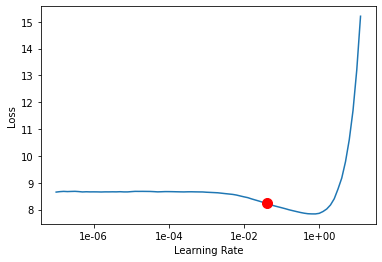

In [11]:
#to find the optimal learning rate
learn.lr_find(start_lr=1e-8, end_lr=1e2)
learn.recorder.plot(suggestion = True)

In [12]:
#fitting the data
learn.fit_one_cycle(2, 5e-2)
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.782369,5.018147,0.272946,00:57
1,4.930685,4.781886,0.287083,00:57


In [13]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.583750,4.650036,0.292024,01:09
1,4.309760,4.534937,0.305030,01:09
2,3.557895,4.653023,0.300610,01:09


In [14]:
learn.freeze_to(-1)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 3.98E-04
Min loss divided by 10: 5.25E-04


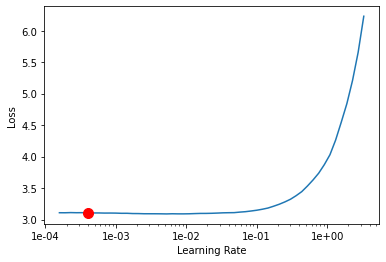

In [15]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [16]:
learn.fit_one_cycle(3, slice(1e-2/(2.6**4), 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.244424,4.722594,0.296131,00:57
1,3.097639,4.750443,0.295164,00:57
2,2.789183,4.769047,0.294851,00:57


In [17]:
learn.freeze_to(-2)
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.00E-03
Min loss divided by 10: 4.37E-04


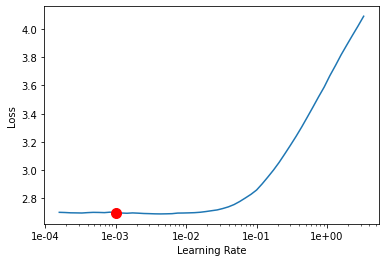

In [18]:
learn.recorder.plot(skip_start=40, suggestion=True)

In [19]:
learn.fit_one_cycle(3, slice(6e-3/(2.6**4), 6e-3))

epoch,train_loss,valid_loss,accuracy,time
0,2.781790,4.927419,0.285729,00:59
1,2.709242,4.973349,0.287113,00:59
2,2.439810,5.048798,0.284315,00:59


In [20]:
#save the encoder model
learn.save_encoder('my_encoder')

In [21]:
# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = df, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
#building classifier
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, metrics=[accuracy, FBeta(beta=1)])

#loading the saved encoder
learn.load_encoder('my_encoder')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (35656 items)
x: TextList
xxbos xxmaj vani xxunk fans hit like solli 500 like xxmaj xxunk xxmaj vendiyathu than,xxbos i love you ajith very i like,xxbos ennaya trailer xxmaj ku mudi xxmaj ellam nikkudhu ... xxmaj vera level trailer ..,xxbos xxmaj vijay xxmaj annaa xxmaj ur xxmaj maa xxrep 6 s xxmaj the xxrep 5 r xxrep 6 i,xxbos நம்ப xxunk xxunk தான் போச்சி
y: CategoryList
unknown_state,Positive,Positive,Positive,Negative
Path: .;

Valid: LabelList (4402 items)
x: TextList
xxbos வீர செங்குந்தர் சார்பாக இந்த திரைப்படம் வெற்றி பெற வாழ்த்துக்கள் xxrep 17 . இயக்குனர் மோகன் . g அவர்களுக்கு எங்கள் சமுதாயத்தின் சார்பாக வாழ்த்துக்கள்,xxbos xxmaj xxunk ah irukku xxrep 4 . mokke movie .. waste of time,xxbos manitha samuthaayam xxunk irunthu intha padam vetri adaiya vaalthukal,xxbos xxup jj mam we miss u,xxbos xxmaj subtitle me xxunk dekhne wale like karo
y: CategoryList
Positive,Negative,Positive,Positive,not-Tamil
Path: .;

Test: None, model=S

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06
Min loss divided by 10: 3.02E-02


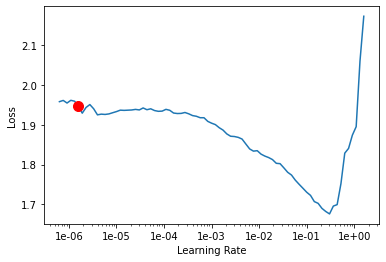

In [23]:
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [24]:
learn.fit_one_cycle(3, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.054923,1.024946,0.602453,0.316344,00:48
1,1.021471,0.987675,0.627215,0.000000,00:46
2,1.017595,0.984900,0.618128,0.000000,00:43


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

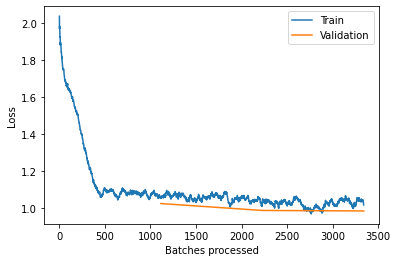

In [25]:
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-06
Min loss divided by 10: 1.00E-06


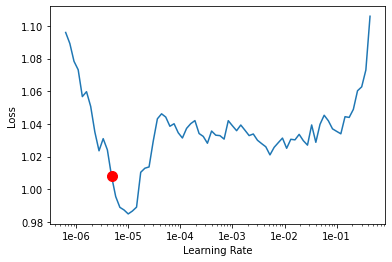

In [26]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.freeze_to(-2) # unfreeze last 2 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,1.042991,0.975659,0.625170,0.339271,00:57
1,0.976131,0.951918,0.633803,0.000000,00:52


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 1.74E-04


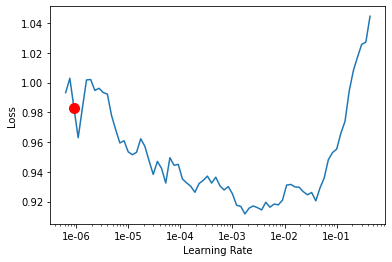

In [28]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [29]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5.3e-3/(2.6**4),5.31e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.981694,0.944166,0.637892,0.353445,01:22
1,0.873651,0.931056,0.648342,0.000000,01:19


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [30]:
learn.freeze_to(-4) # unfreeze last 4 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.freeze_to(-5) # unfreeze last 5 layers
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

# Unfreezing all the layers and training
learn.unfreeze() # unfreze all
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.910899,0.951074,0.644707,0.402711,01:46
1,0.750066,0.967248,0.644934,0.000000,01:56


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.749283,0.987893,0.636529,0.393573,01:55
1,0.652671,1.047523,0.625398,0.000000,02:05


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.577287,1.110984,0.622217,0.400308,01:51
1,0.545690,1.134516,0.621763,0.000000,01:57
2,0.465571,1.170792,0.622899,0.000000,01:59


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")
/usr/local/lib/python3.7/dist-packages/nu

In [31]:
#getting the predictions
preds, targets = learn.get_preds()
predictions = np.argmax(preds, axis = 1)

In [32]:
pd.crosstab(predictions, targets)

col_0,0,1,2,4,5
row_0,,,,,
0,98,70,126,10,60
1,78,173,144,9,59
2,229,175,2089,60,277
4,7,8,34,137,24
5,58,51,153,28,245


In [33]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
cm=confusion_matrix(predictions,targets)
print(cm)
score = accuracy_score( predictions, targets)
print(score)

[[  98   70  126   10   60]
 [  78  173  144    9   59]
 [ 229  175 2089   60  277]
 [   7    8   34  137   24]
 [  58   51  153   28  245]]
0.6228986824170831


In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(predictions,targets, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.2085    0.2692    0.2350       364
           1     0.3627    0.3737    0.3681       463
           2     0.8205    0.7382    0.7772      2830
           4     0.5615    0.6524    0.6035       210
           5     0.3684    0.4579    0.4083       535

    accuracy                         0.6229      4402
   macro avg     0.4643    0.4983    0.4784      4402
weighted avg     0.6544    0.6229    0.6362      4402

